# Soluzioni esercitazione 18/04/2025
## Fisica Computazionale – gruppo A

**Esercizi cinematica, moto in 2 dimensioni, moto circolare e grafici.**
---

## **Esercizio 1: Moto su in piano inclinato**
**Traccia:** Un'auto viene parcheggiata priva di freno a mano sulla sommità di una collina che forma un angolo di $\theta = 30^\circ$ rispetto alla direzione orizzontale. Sotto l'azione inesorabile della gravità, la macchina inizia muoversi percorrendo l'intera collina per poi fermarsi a valle dopo aver percorso un tratto $d$. Sapendo che la collina è alta $0.025$ km, calcolare: la lunghezza del tratto percorso lungo la collina, l'accelerazione che l'auto sperimenta lungo la collina, il modulo dell'accelerazione lungo la discesa, il tempo necessario e la velocità con cui l'auto arriva alla fine della collina, la distanza $d$ che l'auto percorre sulla strada pianeggiante prima di fermarsi, sapendo che sperimenta una decelerazione costante di $0.75$ m/s².

<details>
  <summary> Mostra la Soluzione</summary>
Per risolvere questo problema possiamo suddividere il moto della macchina in due fasi: 
    1. la discesa lungo la collina 
    2. il movimento sulla strada pianeggiante dopo la discesa. 
    
Affronteremo ciascuna fase separatamente.   
    
**Fase 1: Discesa lungo la collina**
    
**1.1 Distanza percorsa lungo la collina** 
    
Lo spazio $s$ può essere calcolata dalla relazione trigonometrica tra l'altezza 
$h$ e l'angolo di inclinazione $\theta$:   
    $$s=\frac{h}{\sin(\theta)}=\frac{0.025\times 1000}{\sin(30^\circ \times \pi/180)} = \frac{25}{0.5} = 50\;m$$
    
Quindi, la macchina percorrerà $50$ m lungo la collina (lunghezza della collina).
    
**1.2 Accelerazione lungo la collina**
    
L'accelerazione lungo la collina è la componente della gravità lungo la direzione della collina, che è data da:  
    $$a_{collina} = g\sin(\theta)=9.81\times\sin(30^\circ \times \pi/180) = 9.81\times0.5 = 4.905 \;m/s^2$$
    
Quindi, l'accelerazione lungo la collina è $a_{collina} = 4.905\;m/s^2$

**1.3 Tempo di percorrenza sulla collina**

Usiamo la legge per il moto uniformemente accelerato per calcolare il tempo $t$ necessario a percorrere la distanza $s$ lungo la collina:
    $$s = \frac{1}{2}a_{collina}t_s^2$$

Risolvendo l'equazione per $t$ otteniamo:  
    $$t_s = \sqrt{\frac{2 s}{a_{collina}}} = \sqrt{\frac{2\times 50}{4.905}} \approx\sqrt{20.4}\approx4.5\;s$$
    
**1.4 Velocità alla fine della collina**    
La velocità finale dell'auto $v_f$, alla fine della collina può essere calcolata in 2 modi, a seconda che vogliamo usare il tempo di percorrenza $t_s$ o la lunghezza della collina $s$:
    $$v_f = v_0 + a_{collina} t_s$$
    $$v_f = \sqrt{v_0^2 + 2 s a_{collina}}$$
**La seconda relazione può essere ricavata dalle equazioni del moto uniformemente accelerato (DA VERIFICARE COME ESERCIZIO PER CASA).**   
    
Il risultato di $v_f$ usando il tempo sarà: 
    $$v_f \approx 0 + 4.905 \times 4.5 \approx 22\;m/s$$
    
**Fase 2: Movimento sulla strada pianeggiante**
    
**Distanza percorsa sulla strada pianeggiante**
    
Usiamo la legge della cinematica per il moto uniformemente accelerato (decelerato in questo caso):
    $$v^2 = v_0^2 + 2 a d$$
    
Sapendo che la velocità al punto $d$ sarà nulla, lespressione si riduce a:
    $$ 0 = v_f^2 + 2\times(-0.75)\times d = v_f^2 + 1.5 d$$
    
Risolvendo l'eqazione per $d$ otteniamo:    
    $$d = \frac{22^2}{1.5}\approx 322.6\;m$$
</details>    

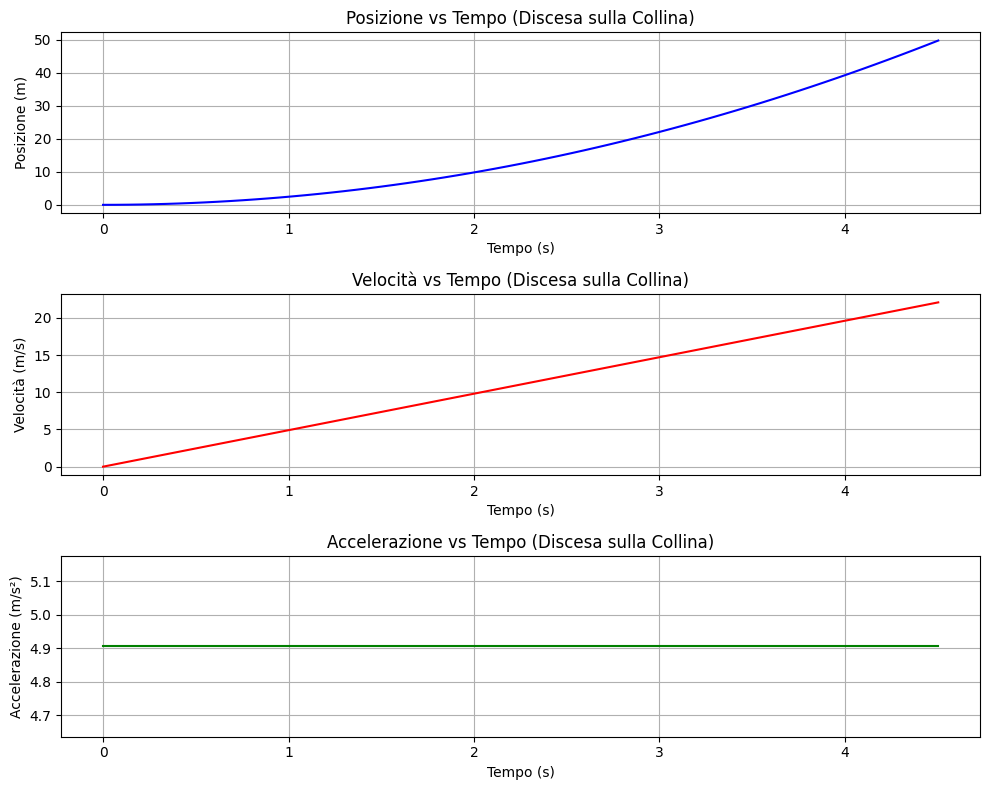

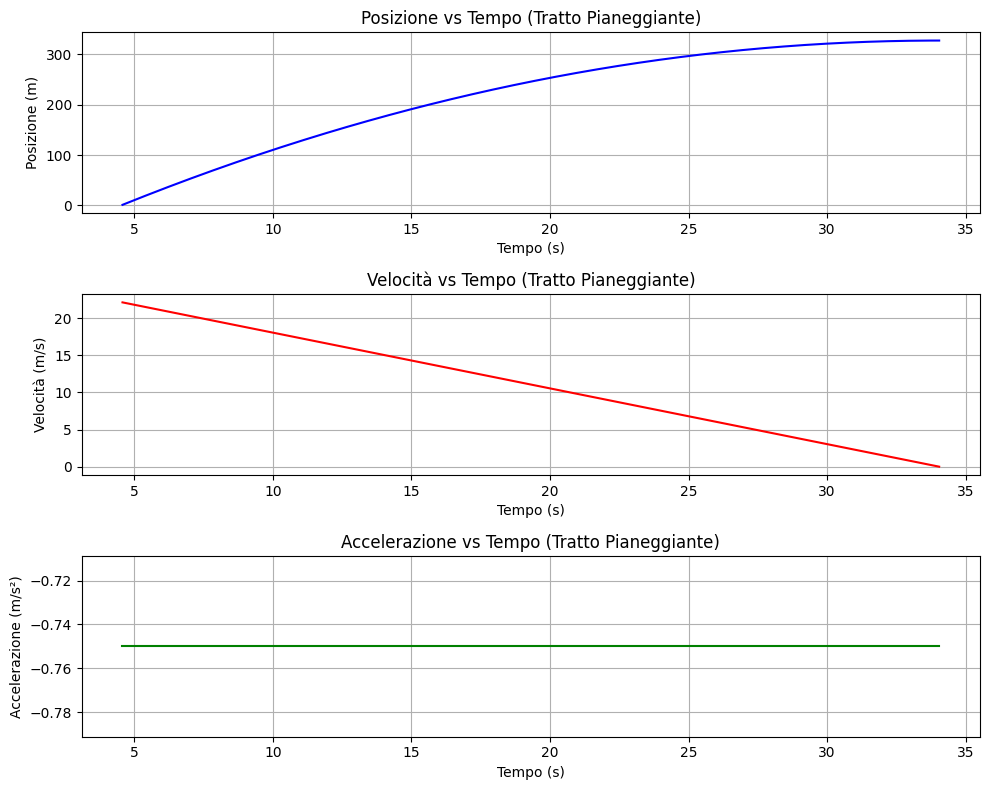

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Dati del problema
h = 0.025  # altezza della collina in km
theta = 30  # angolo della collina in gradi
g = 9.81  # accelerazione di gravità in m/s²
a_decelerazione = 0.75  # decelerazione sulla strada pianeggiante in m/s²

# Conversione unità
h = h * 1000  # altezza in metri

# Fase 1: Calcolare l'accelerazione lungo la collina
theta_rad = np.radians(theta)  # conversione angolo in radianti
a_col = g * np.sin(theta_rad)  # accelerazione lungo la collina (m/s²)

# Distanza percorsa lungo la collina (s = h / sin(theta))
s_collina = h / np.sin(theta_rad)

# Calcolare la velocità finale alla fine della discesa usando la relazione v^2 = v_0^2 + 2 * a * s
v0 = 0  # velocità iniziale
v_f_collina = np.sqrt(2 * a_col * s_collina)  # velocità finale alla fine della collina

# Calcolare il tempo impiegato sulla collina usando v = v0 + a * t
t_collina = v_f_collina / a_col  # tempo per scendere dalla collina

# Fase 2: Calcolare la distanza percorsa sulla strada pianeggiante
# Dato che l'auto si ferma sulla strada pianeggiante, utilizziamo la formula v^2 = v0^2 - 2 * a * d
# dove v_f = 0 è la velocità finale

d_pianeggiante = v_f_collina**2 / (2 * a_decelerazione)  # distanza sulla strada pianeggiante

# Creiamo il tempo totale di simulazione
t_pianeggiante = v_f_collina / a_decelerazione  # tempo per fermarsi sulla strada pianeggiante

# Creiamo il tempo totale (collina + pianeggiante)
t_totale = t_collina + t_pianeggiante

# Time array per la simulazione (creiamo un array di tempi da 0 a t_totale)
time = np.linspace(0, t_totale, 500)

# Fase 1 (discesa sulla collina)
# Velocità e posizione lungo la collina
posizione_collina = 0.5 * a_col * time[time <= t_collina]**2  # posizione lungo la collina (m)
velocita_collina = a_col * time[time <= t_collina]  # velocità lungo la collina (m/s)
accelerazione_collina = np.full_like(velocita_collina, a_col)  # accelerazione costante sulla collina

# Fase 2 (tratto pianeggiante)
# Velocità, posizione e accelerazione sul tratto pianeggiante
posizione_pianeggiante = v_f_collina * (time[time > t_collina] - t_collina) - 0.5 * a_decelerazione * (time[time > t_collina] - t_collina)**2
velocita_pianeggiante = v_f_collina - a_decelerazione * (time[time > t_collina] - t_collina)
accelerazione_pianeggiante = np.full_like(velocita_pianeggiante, -a_decelerazione)

# Combinare i dati delle due fasi
posizione = np.concatenate([posizione_collina, posizione_pianeggiante])
velocita = np.concatenate([velocita_collina, velocita_pianeggiante])
accelerazione = np.concatenate([accelerazione_collina, accelerazione_pianeggiante])

# Grafici separati per la discesa e la strada pianeggiante

# Fase 1: Discesa sulla collina
plt.figure(figsize=(10, 8))

# Posizione vs tempo (collina)
plt.subplot(3, 1, 1)
plt.plot(time[time <= t_collina], posizione_collina, label='Posizione', color='blue')
plt.title('Posizione vs Tempo (Discesa sulla Collina)')
plt.xlabel('Tempo (s)')
plt.ylabel('Posizione (m)')
plt.grid(True)

# Velocità vs tempo (collina)
plt.subplot(3, 1, 2)
plt.plot(time[time <= t_collina], velocita_collina, label='Velocità', color='red')
plt.title('Velocità vs Tempo (Discesa sulla Collina)')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocità (m/s)')
plt.grid(True)

# Accelerazione vs tempo (collina)
plt.subplot(3, 1, 3)
plt.plot(time[time <= t_collina], accelerazione_collina, label='Accelerazione', color='green')
plt.title('Accelerazione vs Tempo (Discesa sulla Collina)')
plt.xlabel('Tempo (s)')
plt.ylabel('Accelerazione (m/s²)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Fase 2: Tratto pianeggiante
plt.figure(figsize=(10, 8))

# Posizione vs tempo (pianeggiante)
plt.subplot(3, 1, 1)
plt.plot(time[time > t_collina], posizione_pianeggiante, label='Posizione', color='blue')
plt.title('Posizione vs Tempo (Tratto Pianeggiante)')
plt.xlabel('Tempo (s)')
plt.ylabel('Posizione (m)')
plt.grid(True)

# Velocità vs tempo (pianeggiante)
plt.subplot(3, 1, 2)
plt.plot(time[time > t_collina], velocita_pianeggiante, label='Velocità', color='red')
plt.title('Velocità vs Tempo (Tratto Pianeggiante)')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocità (m/s)')
plt.grid(True)

# Accelerazione vs tempo (pianeggiante)
plt.subplot(3, 1, 3)
plt.plot(time[time > t_collina], accelerazione_pianeggiante, label='Accelerazione', color='green')
plt.title('Accelerazione vs Tempo (Tratto Pianeggiante)')
plt.xlabel('Tempo (s)')
plt.ylabel('Accelerazione (m/s²)')
plt.grid(True)

plt.tight_layout()
plt.show()


## **Esercizio 2: Moto Circolare di una Giostra**
Un bambino è seduto su un cavallo di una giostra che ruota con velocità costante di 2 giri al minuto. Sapendo che il raggio della giostra è di $5000$ mm, determinare:

- La velocità angolare della giostra in radianti al secondo.
- La velocità lineare del bambino.
- L'accelerazione centripeta che il bambino sperimenta.

<details>
  <summary> Mostra la Soluzione</summary>
    
**1. Determinare la velocità angolare**
    
La velocità angolare $\omega$ (misurata in rad/s) è legata alla frequenza di rotazione tramite la relazione:
    $$\omega = 2\pi f$$
dove $f$ è la frequenza di rotazione (giri al secondo)
    
Dato che la giostra compie 2 giri al minuto, convertiamo in giri al secondo:
    $$f = \frac{2\;\text{giri}}{60\;\text{s}} = \frac{1}{30}\text{giri}/s$$

Sostutuendo nell'equazione per $\omega$ otteniamo:
    $$\omega = 2\pi\times\frac{1}{30}\approx\frac{6.28}{30}\approx0.21\;\text{rad}/s$$
    
**2. Determinare la velocità lineare**
    
La velocità lineare $v$ è legata alla velocità angolare $\omega$ tramite la relazione:
    $$v = \omega R$$
    
Sostituendo i valori:
    $$v = 0.21 \times 5\;m\approx 1.05\;m/s$$
    
**3. Determinare l'accelerazione centripeta**

L’accelerazione centripeta è data da:
    $$a_c = \frac{v^2}{R} = \frac{1.05^2}{5}\approx 0.22\;m/s^2$$
</details>    

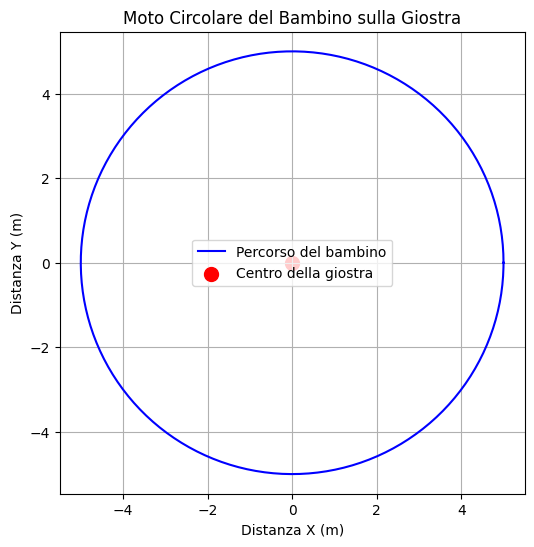

Velocità angolare: 0.209 rad/s
Velocità lineare: 1.04 m/s
Accelerazione centripeta: 0.22 m/s²


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Dati
R = 5  # Raggio della giostra in metri
omega = 0.209  # Velocità angolare in rad/s
v = omega * R  # Velocità lineare
T = 2 * np.pi / omega  # Periodo di rotazione
t = np.linspace(0, T, 300)  # Intervallo di tempo per un giro

# Posizione del bambino sulla giostra
x = R * np.cos(omega * t)
y = R * np.sin(omega * t)

# Accelerazione centripeta
a_c = v**2 / R

# Grafico del moto circolare
plt.figure(figsize=(6,6))
plt.plot(x, y, label="Percorso del bambino", color='b')
plt.scatter([0], [0], color='r', label="Centro della giostra", s=100)
plt.xlabel("Distanza X (m)")
plt.ylabel("Distanza Y (m)")
plt.title("Moto Circolare del Bambino sulla Giostra")
plt.legend()
plt.axis("equal")
plt.grid()
plt.show()

# Stampa dei risultati
print(f"Velocità angolare: {omega:.3f} rad/s")
print(f"Velocità lineare: {v:.2f} m/s")
print(f"Accelerazione centripeta: {a_c:.2f} m/s²")


## **Esercizio 3: Il Tiro Perfetto a Basket (DIFFICILE!)**
**Traccia:** Tre giocatori di altezze differenti ($1.75$ m, $1.90$ m e $2.05$ m) tirano un pallone da metà campo ($14$ m dal canestro), mirando a un canestro posto a $y_{canestro} = 3.05$ m.
Il pallone parte sempre con velocità $v_0 = 10$ m/s.
Qual è l'angolo $\theta$ con cui ciascun giocatore deve tirare affinché il pallone entri nel canestro? Qual è l'altezza massima $y_{max}$ a cui ogni giocatore farà arrivare il pallone? Quale sarà il modulo della velocità quando la palla entrerà a canestro $v_{canestro}$?

<details>
  <summary> Mostra la Soluzione</summary>
Per risolvere questo esercizio, consideriamo il movimento del pallone come un problema di cinematica in due dimensioni.
    
Il moto del pallone è descritto da due equazioni: una per la componente orizzontale del moto e una per la componente verticale.
    
**Componente orizzontale:**
$$x(t) = v_x\cdot t = v_0\cos(\theta) t$$    
    
**Componente verticale:**
$$y(t) = v_y\cdot t -\frac{1}{2}g t^2= v_0\sin(\theta) t -\frac{1}{2}g t^2$$    
    
Al tempo $t$ il pallone deve trovarsi esattamente a $14$ m in orizzontale e a $3.05$ m in verticale, dobbiamo risolvere il sistema di equazioni per ottenere $t$ e $\theta$, quindi:    
    
$$x(t) = 14\;\;\text{e}\;\;y(t) = 3.05$$    
    
Dalla componente orizzontale possiamo calcolare il tempo di volo del pallone, ovvero il tempo necessario per far arrivare il pallone dalla metà campo al canestro:
    
$$14 = v_0 \cos(\theta)\cdot t$$
$$ t = \frac{14}{\cos(\theta)}$$     
    
Sostituendo questo valore di $t$ nell'equazione per la componente verticale y(t) otterremo una equazione che dipendo solo da $\theta$:

$$3.05 = v_0\sin(\theta)\cdot \frac{14}{v_0 \cos(\theta)}-\frac{1}{2}g\left[\frac{14}{v_0\cos(\theta)}\right]^2 = 14\tan(\theta)-\frac{196\cdot g}{200\cdot\cos^2(\theta)}$$  

**Questa è un'equazione trigonometrica che possiamo risolvere numericamente per $\theta$ (DA FARE A CASA)**    
    
L'altezza massima si verifica quando la velocità verticale $v_y$ diventa zero. Il tempo in cui questa condizione si verifica si ricava dalla relazione:    
    $$v_y(t_{max}) = v_0\sin(\theta) - g\cdot t_{max} = 0$$
    $$t_{max} = \frac{v_0 \sin(\theta)}{g}$$
    
Ora che abbiamo $t_{max}$, sostituendolo nell'equazione della posizione verticale $y(t)$ possiamo calcolare l'altezza massima a cui arriva il pallone:
    $$y_{max} = v_0 \sin(\theta)\cdot t_{max} - \frac{1}{2}g t_{max^2} = \frac{v_0^2 \sin^2(\theta)}{g} - \frac{1}{2}\frac{v_0^2 \sin^2(\theta)}{g} = \frac{v_0^2 \sin^2(\theta)}{2g}$$
    
Per calcolare la velocità del pallone all'altezza del canestro possiamo ragginarecome se fosse un proiettile che parte da 
$y_{max}$. Consideriamo il moto verticale come un moto uniformemente accelerato con velocità iniziale nulla.
In altre parole nel punto più alto $y_{max}$, la velocità verticale è zero ($v_{y,max} = 0$)
da questo punto, il pallone inizia a scendere con accelerazione $g$.    
    
Per calcolare la velocità verticale del pallone quando raggiunge l'altezza
$y_{canestro}$ usiamo l'equazione del moto uniformemente accelerato:
$$v_y^2 = v_{y,max}^2 + 2 g (y_{max} - y_{canestro})$$   

Poichè la velocità iniziale è nulla $v_{y,max} = 0$ otteniamo:     
$$v_y = \sqrt{2 g (y_{max} - y_{canestro})}$$    

La componente orizzontale della velocità resta costante:
    $$v_x = v_0\cos(\theta)$$
    
Il modulo della velocità del pallone sarà quindi: 
    $$v_{canestro} = \sqrt{v_x^2 + v_y^2} = \sqrt{v_0^2\cos^2(\theta) + 2g(y_{max}-y_{canestro})}$$
</details>

<details>
  <summary> Algoritmo per il calcolo di $\theta$: Ricerca per tentativi (o bisezione) </summary>

# Metodo della Bisezione per trovare l'angolo $ \theta $ del tiro a canestro

## Descrizione
Per il problema del tiro a canestro, vogliamo trovare l'angolo $ \theta $ che permette al pallone di raggiungere il canestro. La traiettoria del pallone è descritta dal moto parabolico, e la condizione per il canestro è che il pallone raggiunga l'altezza $ y_{\text{canestro}} = 3.05 \, \text{m} $ quando il pallone è a $ x = 14 \, \text{m} $.

## Passaggi per il Metodo della Bisezione

1. **Definizione della funzione**:
    - La funzione che vogliamo risolvere è:
    $$
    f(\theta) = y_{\text{pallone}}(\theta, x = 14) - 3.05
    $$
    dove $ y_{\text{pallone}}(\theta, x) $ è la funzione che descrive l'altezza del pallone in funzione dell'angolo $ \theta $ e della distanza orizzontale $ x $.

    La funzione $ y_{\text{pallone}} $ è data da:
    $$
    y(\theta, t) = v_0 \sin(\theta) \cdot t - \frac{1}{2} g t^2
    $$
    dove:
    - $ v_0 $ è la velocità iniziale del pallone.
    - $ \theta $ è l'angolo di lancio.
    - $ g $ è l'accelerazione gravitazionale ($ 9.81 \, \text{m/s}^2 $).
    - $ t $ è il tempo impiegato per arrivare alla distanza orizzontale di 14 m.

    Il tempo $ t $ per raggiungere la distanza $ x = 14 \, \text{m} $ è dato da:
    $$
    t = \frac{x}{v_0 \cos(\theta)}
    $$

    Pertanto, l'altezza del pallone al tempo $ t $ sarà:
    $$
    y(\theta) = v_0 \sin(\theta) \cdot \left( \frac{x}{v_0 \cos(\theta)} \right) - \frac{1}{2} g \left( \frac{x}{v_0 \cos(\theta)} \right)^2
    $$
    Semplificando, otteniamo:
    $$
    f(\theta) = v_0 \tan(\theta) \cdot x - \frac{g x^2}{2 v_0^2 \cos^2(\theta)} - 3.05
    $$

2. **Scelta dell'intervallo iniziale**:
    - Scegliere un intervallo $ [a, b] $ per l'angolo $ \theta $ (ad esempio, tra 0 e 45 gradi).

3. **Calcolo del punto medio**:
    - Calcolare il punto medio $ m $ dell'intervallo corrente:
      $$
      m = \frac{a + b}{2}
      $$

4. **Verifica della soluzione**:
    - Se $ f(m) $ è abbastanza vicino a zero (ossia $ |f(m)| < \epsilon $, con $ \epsilon $ tolleranza definita), allora $ m $ è la soluzione.

5. **Aggiornamento dell'intervallo**:
    - Se $ f(m) \cdot f(a) < 0 $, aggiorniamo $ b = m $.
    - Se $ f(m) \cdot f(b) < 0 $, aggiorniamo $ a = m $.

6. **Ripetizione**:
    - Ripetere i passi 3-5 fino a che la condizione di convergenza $ |f(m)| < \epsilon $ è soddisfatta o fino al numero massimo di iterazioni.

## Funzione per la Traiettoria del Pallone
La traiettoria del pallone è descritta da due equazioni per il moto parabolico:
- Per la componente orizzontale:
  $$
  x(t) = v_0 \cos(\theta) \cdot t
  $$
- Per la componente verticale:
  $$
  y(t) = y_0 + v_0 \sin(\theta) \cdot t - \frac{1}{2} g t^2
  $$

Dove:
- $ v_0 $ è la velocità iniziale del pallone.
- $ \theta $ è l'angolo di lancio.
- $ g $ è l'accelerazione gravitazionale ($ 9.81 \, \text{m/s}^2 $).
- $ y_0 = 0 \, \text{m} $ è l'altezza di partenza del pallone.
</details>    

In [5]:
# Importiamo le librerie che ci servono



## **Esercizio 4. Moto del proiettile**

Dati la velocità iniziale del proiettile e l'angolo con cui viene lanciato trova, utilizzando il metodo di Eulero trova la gittata, l'altezza massima e il tempo di volo. Fai un grafico della traiettoria.

Assumi che il proiettile sia lanciato dall'origine e atterri al suolo ($y=0$).

Il tempo di volo è 0.203 secondi.
La gittata è 0.352 metri.
L'altezza massima raggiunta è 0.0505 metri.


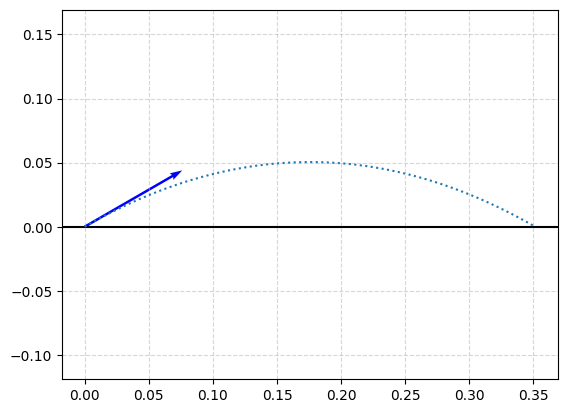

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funzioni_fis_comp import *    # la nostra libreria personalizzata

# dati
x0, y0 = 0, 0       # [m]
v0_modulo = 2      # [m/s]
v0_angolo = 30          # [°]
ax, ay = 0, -9.81   # [m/s**2]

# Usiamo la funzione definita la scorsa settimana per passare da coordinate polari a cartesiane:
v0_vettore = da_polari_a_cartesiane(v0_modulo, v0_angolo)
v0x, v0y = v0_vettore

# l'incremento temporale
dt = 0.001          # [s]

# inizializziamo le liste che useremo per immagazzinare i risultati
ts = [0]
xs = [x0]
ys = [y0]
vxs = [v0x]
vys = [v0y]

# Metodo di Eulero:
while ys[-1] >= 0:
    # calcoliamo le velocità 
    vx = vxs[-1] + ax*dt
    vy = vys[-1] + ay*dt
    
    # aggiorniamo le posizioni
    x = xs[-1] + vx*dt
    y = ys[-1] + vy*dt

    # aggiorniamo le varie liste per tenere traccia del moto
    ts.append(ts[-1] + dt)

    xs.append(x)
    ys.append(y)

    vxs.append(vx)
    vys.append(vy)

# Calcoliamo i risultati richiest
tempo_di_volo = ts[-1]
gittata = xs[-1]
altezza_max = max(ys)
print(f'Il tempo di volo è {tempo_di_volo:.3g} secondi.')
print(f'La gittata è {gittata:.3g} metri.')
print(f'L\'altezza massima raggiunta è {altezza_max:.3g} metri.')

# Grafico della traiettoria
plt.axhline(y=0, ls='-', color='black')
plt.axis('equal')
plt.plot(xs, ys, ':')
plt.grid(ls=':')

# Disegna direzione velocità iniziale
disegna_vettore(v0_vettore/v0_modulo * gittata/4, np.zeros_like(v0_vettore))


#### Qual è l'angolo di lancio per cui la gittata è massima?

Per conoscere l'andamento della gittata rispetto all'angolo di partenza possiamo ripetere la simulazione per diversi angoli di lancio, a parità di velocità.

L'angolo di gittata massima è uguale a 45°.


Text(0, 0.5, 'gittata')

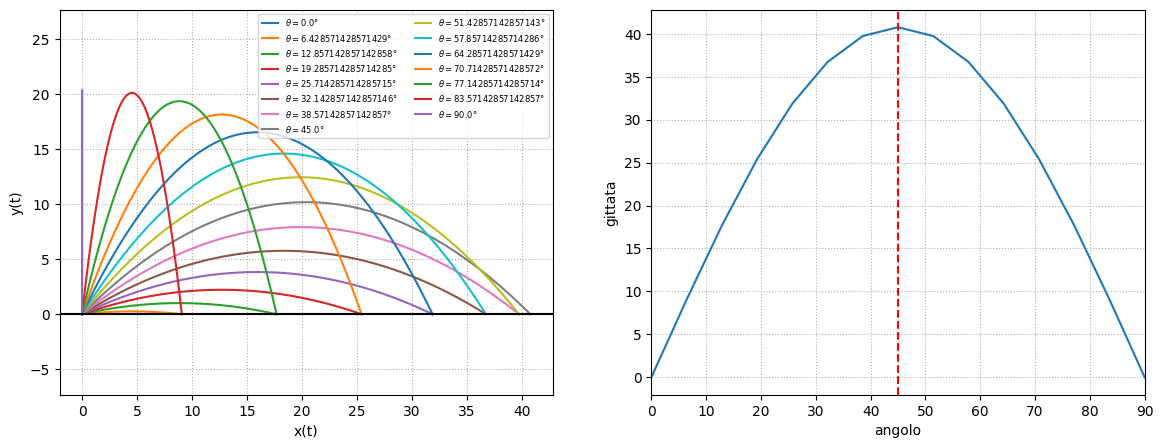

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from funzioni_fis_comp import *    # la nostra libreria personalizzata

# dati
x0, y0 = 0, 0       # [m]
v0_modulo = 20      # [m/s]
ax, ay = 0, -9.81   # [m/s**2]

dt = 0.001          # [s]
n_angoli = 15
angoli = np.linspace(0, 90, n_angoli)    # da 0 gradi a 90 gradi
gittate = []

# prepariamo due sottografici
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

for v0_angolo in angoli:
    v0_vettore = da_polari_a_cartesiane(v0_modulo, v0_angolo)
    v0x, v0y = v0_vettore
    ts = [0]
    xs = [x0]
    ys = [y0]
    vxs = [v0x]
    vys = [v0y]

    # Metodo di Eulero:
    while ys[-1] >= 0:
        vx = vxs[-1] + ax*dt
        vy = vys[-1] + ay*dt
        x = xs[-1] + vx*dt
        y = ys[-1] + vy*dt
        ts.append(ts[-1] + dt)
        xs.append(x)
        ys.append(y)
        vxs.append(vx)
        vys.append(vy)

    gittata = xs[-1]
    gittate.append(gittata)

    # Grafico alcune delle traiettorie al variare dell'angolo di lancio
    axs[0].plot(xs, ys, label=rf'$\theta = {v0_angolo}°$')

axs[0].legend(fontsize=6, ncol=2)
axs[0].axis('equal')
axs[0].grid(ls=':')
axs[0].axhline(y=0, ls='-', color='black')
axs[0].set_xlabel('x(t)')
axs[0].set_ylabel('y(t)')

angolo_gittata_max = angoli[np.argmax(gittate)]
print(f'L\'angolo di gittata massima è uguale a {angolo_gittata_max:.0f}°.')
# Facciamo il grafico della gittata in funzione dell'angolo di lancio
axs[1].plot(angoli, gittate)
axs[1].grid(ls=':')
axs[1].axvline(x=angolo_gittata_max, color='red', ls='--')
axs[1].set_xlim(min(angoli), max(angoli))
axs[1].set_xlabel('angolo')
axs[1].set_ylabel('gittata')



## **Esercizio 5. Moto rettilineo in 2D - Un cliché cinematografico**

In una caratteristica [scena da film d'azione](https://youtu.be/T1ETonG0R2U?si=_o10foCCiVo3uWll&t=91), un'automobile sportiva viaggia a velocità sostenuta $v_0 = 90$ miglia orarie (1 miglio = 1,6 km) verso un passaggio a livello, mentre è in arrivo un treno con velocità costante $V = 75$ miglia orarie. La strada su cui viaggia la macchina attraversa perpendicolarmente i binari.

Quando l'auto si trova a distanza $d = 200$ m dall'incrocio, il pilota decide di provare a saltare davanti al treno e accelera con accelerazione costante $a$. In quel momento, il treno si trova a $D = 100$ m dai binari.

Qual è il minimo valore di $a$ perché auto e pilota attraversino incolumi il passaggio a livello? 



Text(0.5, 1.0, 'Diagramma problema')

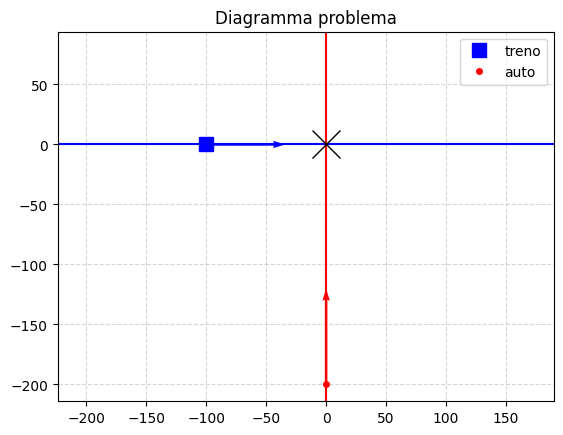

In [18]:
# Per disegnare il diagramma del problema

import numpy as np
import matplotlib.pyplot as plt

plt.axhline(y=0, color='blue')
plt.axvline(x=0, color='red')

plt.plot(-100, 0, 'bs', markersize=10, label='treno')
plt.plot(0, -200, 'ro', markersize=4, label='auto')
plt.plot(0,0, 'x', markersize=20, color='black')

disegna_vettore(np.array([33, 0])*2, np.array([-100, 0]))
disegna_vettore(np.array([0, 40])*2, np.array([0, -200]), color='red')

plt.axis('equal')
plt.legend()
plt.title('Diagramma problema')

Innanzitutto convertiamo le velocità in unità SI:

$$v_0 = 90\ mph = 144\ {km/h} = 144\cdot\frac{1000}{3600} = 40.0\ m/s$$

$$V = 75\ mph = 120\ {km/h} = 120\cdot\frac{1000}{3600} =  33.3\ m/s$$

(mph = miles per hour)

Calcoliamo quanto tempo impiega il treno, che viaggia di moto rettilineo uniforme lungo l'asse $x$, ad arrivare all'incrocio:

$$ D = V\cdot t_t\qquad\Rightarrow\qquad t_t=\frac{D}{V} = \frac{100\ m}{33.3\ m/s}= 3\ s$$

Ora richiediamo che in questo intervallo di tempo l'automobile riesca ad attraversare l'incrocio, cioè che si trovi al di là dei binari ($y>0$):

$$ y(t_t) = y_0 + v_0 t_t + \frac{1}{2}at_t^2 > 0 $$

$$ -200 + 40 \cdot 3 + \frac{1}{2}a\cdot (3)^2 > 0 $$

$$ a > \frac{2\cdot 80}{9} \approx 17.8 m/s^2 $$

Per riuscire nell'impresa, l'automobile deve avere un'accelerazione di almeno $17.8 m/s^2$ (quasi $2 g$ !)


Non ce l'ha fatta...


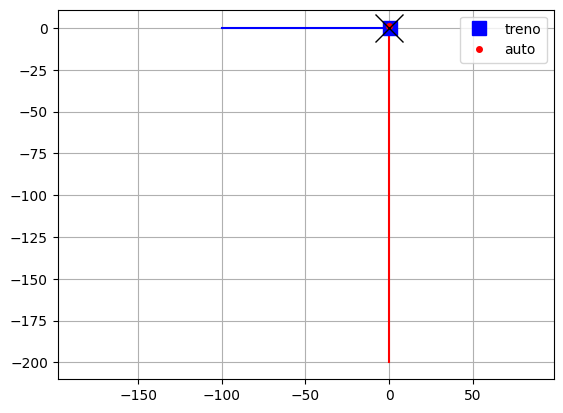

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# dati automobile
v_0 = 90 * 1.6 / 3.6
d = 200

# dati treno
V = 75 *1.6 / 3.6
D = 100

# il tempo della simulazione sarà il tempo impiegato dal treno ad arrivare al passaggio al livello
t_finale = 120 / V
dt = 0.01
# ts = np.arange(0, t_finale, dt)

# inizializziamo a zero le grandezze che andiamo a variare nella simulazione
xs_auto, ys_auto = [0], [-d]
vx_auto, vys_auto = 0, [v_0]
ay_auto = 17.7

xs_treno, ys_treno = [-D], [0]
vx_treno, vy_treno = V, 0
t=0

while ys_auto[-1] < 0:
    t = t + dt
    # Eulero per il treno:
    x_treno = xs_treno[-1] + vx_treno*dt
    y_treno = ys_treno[-1] + vy_treno*dt

    # Eulero per l'auto:
    vy_auto = vys_auto[-1] + ay_auto*dt
    x_auto = xs_auto[-1] + vx_auto*dt
    y_auto = ys_auto[-1] + vy_auto*dt

    xs_treno.append(x_treno)
    ys_treno.append(y_treno)
    
    xs_auto.append(x_auto)
    ys_auto.append(y_auto)
    vys_auto.append(vy_auto)

if x_treno > x_auto:
    print('Non ce l\'ha fatta...')
else:
    print('Ce l\'ha fatta!')

plt.plot(xs_treno, ys_treno, color='blue')
plt.plot(xs_auto, ys_auto, color='red')
plt.axis('equal')
plt.grid()
plt.plot(xs_treno[-1], ys_treno[-1], 'bs', markersize=10, label='treno')
plt.plot(xs_auto[-1], ys_auto[-1], 'ro', markersize=4, label='auto')
plt.plot(0,0, 'x', markersize=20, color='black')
plt.legend()



## **Extra**

Abbiamo trovato approssimativamente il valore minimo possibile di $a$ sostituendo a mano diversi valori e andando per tentativi. Riesci a pensare ad un algoritmo che lo faccia in automatico?

## **Richiami di geometria**

## Versori

Un versore $\hat{u}$ è un vettore unitario, cioè di modulo 1: $|\hat{u}|^2=1$. 

Se moltiplichiamo una costante $k$ per un versore, otterremo un vettore $\vec{v}$ che avrà modulo $k$ e come direzione la direzione di $\hat{u}$.

## Vettori perpendicolari

Dato un vettore bidimensionale $\vec{v}$, come possiamo ottenere un vettore ad esso perpendicolare? Basta invertire le sue componenti e cambiare segno ad una delle due:

$$ \vec{v}=(v_x,v_y) \quad \rightarrow \quad \vec{w}=(v_y,-v_x)$$

Per dimostrare che $\vec{v}$ e $\vec{w}$ sono perpendicolari, basta verificare che il loro prodotto scalare è nullo.


## **Esercizio 6. Moto circolare uniforme**

Simula con il metodo di Eulero il moto di un punto materiale che subisce un'accelerazione costante in modulo, e perpendicolare alla direzione del moto (cioè alla sua velocità). 

Prova a fare un grafico della traiettoria: 
- Che cosa osservi? 
- Che cosa cambia variando il modulo della velocità iniziale?
- E variando il modulo dell'accelerazione?
- Spiega perché il risultato della simulazione si allontana gradualmente da quello che ci aspettiamo dalla teoria.


(-10.999999729497183,
 10.999999987118914,
 -10.999999678071452,
 10.99999984256654)

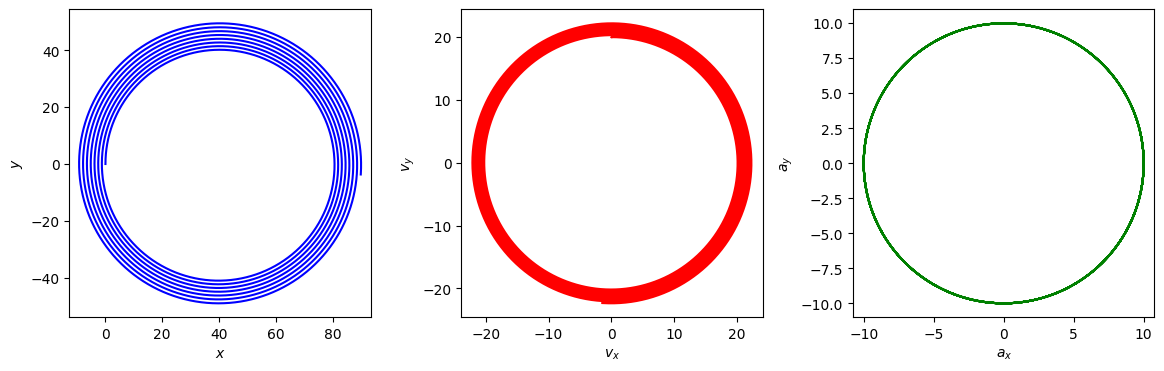

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from funzioni_fis_comp import *    # la nostra libreria personalizzata

# dati
x0, y0 = 0, 0       # il punto parte dall'origine
v0x, v0y = 0, 20    # velocità iniziale parallela all'asse y

a_modulo = 10
a0x, a0y = a_modulo, 0     # accelerazione iniziale perpendicolare a v0

dt = 0.01
tempo_totale= 100

ts = [0]
xs = [x0]
ys = [y0]
vxs = [v0x]
vys = [v0y]
axs = [a0x] 
ays = [a0y]

# Metodo di Eulero:
while ts[-1] < tempo_totale:
    # aggiorniamo la velocità
    vx = vxs[-1] + ax*dt
    vy = vys[-1] + ay*dt
    # aggiorniamo la posizione
    x = xs[-1] + vx*dt
    y = ys[-1] + vy*dt
    # calcoliamo il versore della velocità    
    v_modulo = np.sqrt(vx**2 + vy**2)
    ux, uy = vx / v_modulo, vy / v_modulo
    # calcoliamo il versore perpendicolare alla velocità
    wx, wy = uy, -ux
    # aggiorniamo l'accelerazione (centripeta)
    ax, ay = a_modulo * wx, a_modulo * wy

    ts.append(ts[-1] + dt)
    xs.append(x)
    ys.append(y)
    vxs.append(vx)
    vys.append(vy)
    axs.append(ax)
    ays.append(ay)

fig, axes = plt.subplots(1, 3, figsize=(14, 4))
fig.subplots_adjust(wspace=.3)

axes[0].plot(xs, ys, color='blue')
axes[1].plot(vxs, vys, color='red')
axes[2].plot(axs, ays, color='green')

axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')
axes[1].set_xlabel('$v_x$')
axes[1].set_ylabel('$v_y$')
axes[2].set_xlabel('$a_x$')
axes[2].set_ylabel('$a_y$')

axes[0].axis('equal')
axes[1].axis('equal')
axes[2].axis('equal')

## **Homework. Ancora moto rettilineo in 2D**

Il passeggero di un treno è connesso alla rete Wi-Fi di bordo. Questa connessione, che dipende da un router che si connette al ripetitore più vicino, cade quando la distanza treno-ripetitore supera i 5 km.

Sapendo che:
- il treno viaggia lungo la retta di equazione $y=2x$, alla velocità di 250 km/h,
- all'istante $t=0$ il treno si trova nell'origine,
- il ripetitore più vicino si trova nel punto $P(2000\ m, 0)$,

calcola in quale istante $t_{down}$ il passeggero perde la connessione. Confronta il risultato con quello ottenuto utilizzando il metodo di Eulero.

#### **Diagramma problema**

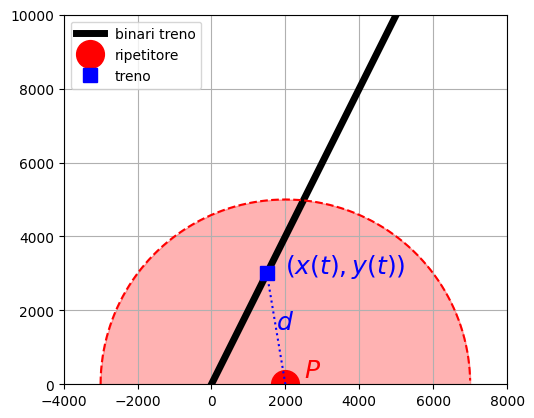

In [ ]:
xs = np.linspace(0, 5000, 2)
ys = 2 * xs
X, Y = (2000, 0)
xt, yt = 1500, 3000
raggio = 5000
xcs = np.arange(-raggio, raggio)
ycs = np.sqrt(raggio**2-xcs**2)

plt.plot(xs, ys, color='black', linewidth=5, label='binari treno')
plt.plot(X, Y, 'ro', label='ripetitore', markersize=20)
plt.plot(xcs+X, ycs+Y, 'r--')
plt.plot(xt, yt, 'bs', markersize=10, label='treno')
plt.plot([X, xt], [Y, yt], 'b:')
plt.text((X+xt)*.5, (Y+yt)*.5, '$d$', fontsize=18, color='blue')
plt.text(xt+500, yt, '$(x(t), y(t))$', fontsize=18, color='blue')
plt.text(X+500, Y+200, '$P$', fontsize=18, color='red')
         
plt.fill_between(xcs + X, ycs + Y, Y, color='red', alpha=0.3)
plt.axis('scaled')
plt.xlim(X-raggio-1000, X+raggio+1000)
plt.ylim(ys[0], ys[-1])
plt.legend()
plt.grid()